In [1]:
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
import eipi10.ml.regression_model as rm
from eipi10.ml.planar_utils import *
from eipi10.ml.utils import *

import logging

reload(rm)
%matplotlib inline

# 1. Exercise 1：LinearRegression
## 1.1 Simple Octave/MATLAB function
## 1.2 Linear regression with one variable

In [3]:
level = logging.INFO
# level = logging.DEBUG
epoch_times, print_num_epoch, keep_cost_num_epoch = check_debug_mode(
    level, epoch_times=1500, print_num_epoch=100, keep_cost_num_epoch=1)

train_X, train_y = load_flat_dataset("data/ex1data1.txt")

model = rm.LinearRegression(num_features=train_X.shape[0],
                            optimizer=GradientOptimizer(0.01),    
                            iterator=NumberIterator(epoch_times),
                            keep_cost_num_epoch=keep_cost_num_epoch)
model.fit(train_X, train_y, print_cost=True, print_num_epoch=print_num_epoch)

print("cost={}".format(model.cost))
print("w={}".format(model.w))
print("b={}".format(model.b))


INFO: Cost after epoch 0: 32.0727338775
INFO: Cost after epoch 100: 5.4799755805
INFO: Cost after epoch 200: 5.1761529629
INFO: Cost after epoch 300: 4.9643620462
INFO: Cost after epoch 400: 4.8167252680
INFO: Cost after epoch 500: 4.7138095311
INFO: Cost after epoch 600: 4.6420682683
INFO: Cost after epoch 700: 4.5920583384
INFO: Cost after epoch 800: 4.5571970466
INFO: Cost after epoch 900: 4.5328956797
INFO: Cost after epoch 1000: 4.5159555031
INFO: Cost after epoch 1100: 4.5041467195
INFO: Cost after epoch 1200: 4.4959149654
INFO: Cost after epoch 1300: 4.4901767134
INFO: Cost after epoch 1400: 4.4861766502
INFO: Final Cost after epoch 1500: 4.4833882566


cost=4.483388256587726
w=[[ 1.16636235]]
b=-3.6302914394043593


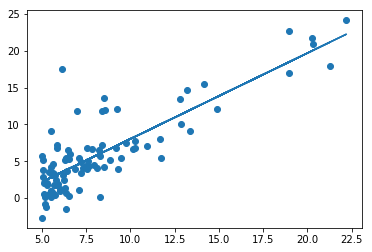

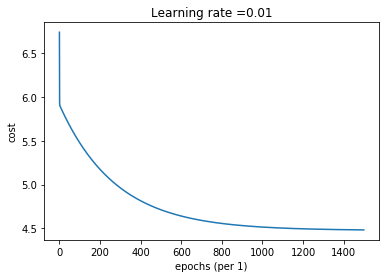

In [4]:
plt.scatter(train_X_orig, train_y_orig)
plt.plot(train_X.T, model.a.T, "-")
# plt.legend('Training data', 'Linear regression')
plt.show()
model.plot_costs(costs=model.costs[1:])

### Visualizing Costs(三维图形和等高图)

(250, 200)


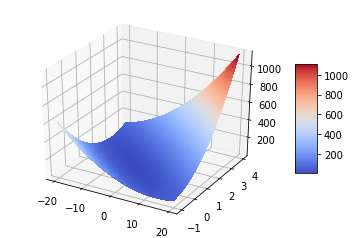

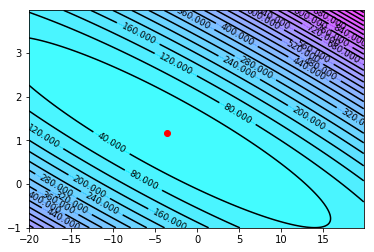

In [5]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Make data.
b = np.arange(-20, 20, 0.2)
w = np.arange(-1, 4, 0.02)
b, w = np.meshgrid(b, w)
b_min = model.b
w_min = model.w

m = b.shape[0]
n = b.shape[1]
costs = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        model.w = np.array(w[i, j]).reshape(1, 1)
        model.b = b[i, j]
        model.compute_cost(train_X, train_y)
        costs[i, j] = model.cost

print(costs.shape)
        
# Plot the surface.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(b, w, costs, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# 填充等高线的颜色, 8是等高线分为几部分
plt.contourf(b, w, costs, 30, alpha = 0.75, cmap = plt.cm.cool)
# 绘制等高线
C = plt.contour(b, w, costs, 30, colors = 'black', linewidth = 0.1)
# 绘制等高线数据
plt.clabel(C, inline = True, fontsize = 9)
plt.plot(b_min, w_min, 'ro')
plt.show()

## 1.3 Linear regression with multiple variable

#### First Attempt

ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [27]:
level = logging.INFO
# level = logging.DEBUG

learning_rate = 0.01
epoch_times, print_num_epoch, keep_cost_num_epoch = check_debug_mode(
    level, epoch_times=400, print_num_epoch=100, keep_cost_num_epoch=1)

train_X, train_y = load_flat_dataset(data_path="data/ex1data2.txt")

/eipi10/python-book/arsenal/eipi10/ml/utils.py:66: RuntimeWarning: overflow encountered in power
  return np.sum(np.power(A-Y, 2))/2/m
/eipi10/python-book/arsenal/eipi10/ml/utils.py:250: RuntimeWarning: invalid value encountered in subtract
  layer.W = layer.W - self.learning_rate * layer.dW


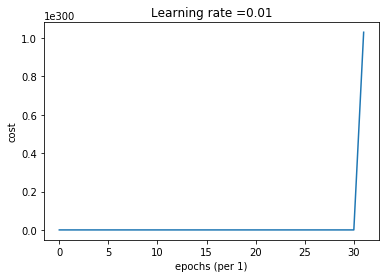

In [28]:
model = rm.LinearRegression(num_features=train_X.shape[0],
                            optimizer=GradientOptimizer(learning_rate),    
                            iterator=NumberIterator(epoch_times),
                            keep_cost_num_epoch=keep_cost_num_epoch)
model.fit(train_X, train_y, print_cost=False, print_num_epoch=print_num_epoch)
model.plot_costs()

上面的梯度下降中，cost函数发生溢出。必须采取归一化处理。

#### Feature Normalization

train_X[:, 0:10]=[[ 0.13000987 -0.50418984  0.50247636 -0.73572306  1.25747602 -0.01973173
  -0.5872398  -0.7218814  -0.78102304 -0.63757311]
 [-0.22367519 -0.22367519 -0.22367519 -1.53776691  1.09041654  1.09041654
  -0.22367519 -0.22367519 -0.22367519 -0.22367519]]
mu=[[ 2000.68085106]
 [    3.17021277]]
sigma=[[  7.94702354e+02]
 [  7.60981887e-01]]


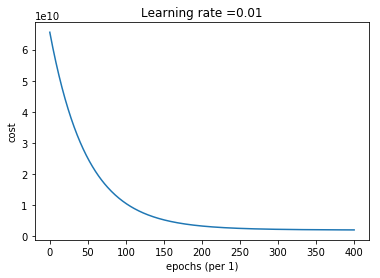

In [29]:
train_X, mu, sigma= feature_normalize(train_X)
print("train_X[:, 0:10]={}".format(X[:, 0:10]))
print("mu={}".format(mu))
print("sigma={}".format(sigma))

model = rm.LinearRegression(num_features=train_X.shape[0],
                            optimizer=GradientOptimizer(learning_rate),    
                            iterator=NumberIterator(epoch_times),
                            keep_cost_num_epoch=keep_cost_num_epoch)
model.fit(train_X, train_y, print_cost=False, print_num_epoch=print_num_epoch)
model.plot_costs()

#### Selecting learning rate

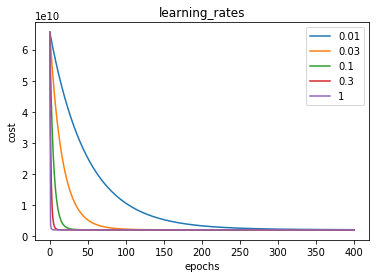

In [22]:
learning_rates = [0.01, 0.03, 0.1, 0.3 , 1]   #如果学习率大于2，梯度下降无法收敛，将会溢出。
line_spec =["b", "r", "g", "y", "m"]

for learning_rate in learning_rates:    
    model = rm.LinearRegression(num_features=train_X.shape[0],
                                optimizer=GradientOptimizer(learning_rate),    
                                iterator=NumberIterator(epoch_times),
                                keep_cost_num_epoch=keep_cost_num_epoch)
    model.fit(train_X, train_y, print_cost=False, print_num_epoch=print_num_epoch)
    plt.plot(np.arange(0, len(model.costs)), model.costs, label=str(learning_rate) )


plt.legend(loc='upper right')  
plt.ylabel('cost')
plt.xlabel("epochs")
plt.title("learning_rates")    
plt.show()


# 2. Exercise 2： Logistic Regression
## 2.1 Logistic Regression
### 2.11 Visualizing the data

这是二维的数据，所以可以可视化数据，通过这个，可以观察决策边界，Logistic Regression也是一种线性分类器。

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

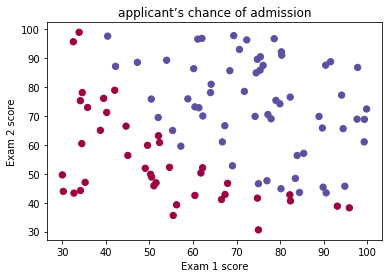

In [9]:
train_X, train_y = load_flat_dataset("data/ex2data1.txt")
plt.scatter(train_X[0,:], train_X[1,:], s=40, c=train_y.T, cmap=plt.cm.Spectral)
plt.ylabel("Exam 2 score")
plt.xlabel("Exam 1 score")
plt.title("applicant’s chance of admission")

### 2.12 Implementation

In [10]:
reload(rm)

level = logging.INFO
# level = logging.DEBUG
epoch_times, print_num_epoch, keep_cost_num_epoch = check_debug_mode(
    level, epoch_times=1500, print_num_epoch=100, keep_cost_num_epoch=10)
learning_rate = 0.01


train_X, train_y = load_flat_dataset("data/ex2data1.txt")

model = rm.LogisticRegression(num_features=train_X.shape[0], activator=Sigmoid,
                              regularizer=Regularizer(), iterator=NumberIterator(epoch_times), 
                              optimizer=GradientOptimizer(learning_rate), initializer=WeightInitializer(),
                              keep_cost_num_epoch=keep_cost_num_epoch)
model.propagate(train_X, train_y)
print("cost={}".format(model.cost))
print("dW={}".format(model.dW))
print("db={}".format(model.db))

np.testing.assert_array_almost_equal(model.cost, 0.6931472)
np.testing.assert_array_almost_equal(model.dW, [[-12.009217,  -11.262842]])
np.testing.assert_array_almost_equal(model.db, -0.100000)


cost=0.6931471805599453
dW=[[-12.00921659 -11.26284221]]
db=[[-0.1]]


由于课程中，使用了fminunc函数进行优化，优化的速度很快。如果采用梯度下降，则必须进行归一化，否者梯度下降的非常慢。

%  Set options for fminunc  
options = optimset('GradObj', 'on', 'MaxIter', 400);  

%  Run fminunc to obtain the optimal theta  
%  This function will return theta and the cost   
[theta, cost] = 	fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

INFO: Cost after epoch 0: 0.6931471806
INFO: Cost after epoch 100: 0.5733330043
INFO: Cost after epoch 200: 0.4973035515
INFO: Cost after epoch 300: 0.4463706723
INFO: Cost after epoch 400: 0.4103102741
INFO: Cost after epoch 500: 0.3835478532
INFO: Cost after epoch 600: 0.3629130354
INFO: Cost after epoch 700: 0.3465071493
INFO: Cost after epoch 800: 0.3331358128
INFO: Cost after epoch 900: 0.3220142724
INFO: Cost after epoch 1000: 0.3126071548
INFO: Cost after epoch 1100: 0.3045372173
INFO: Cost after epoch 1200: 0.2975311353
INFO: Cost after epoch 1300: 0.2913860446
INFO: Cost after epoch 1400: 0.2859481817
INFO: Final Cost after epoch 1500: 0.2810988341


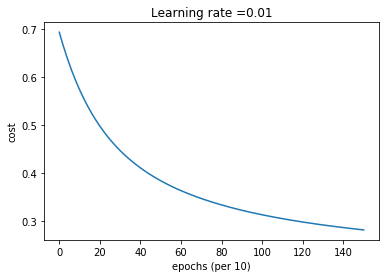

On the train set:
Accuracy: 0.9


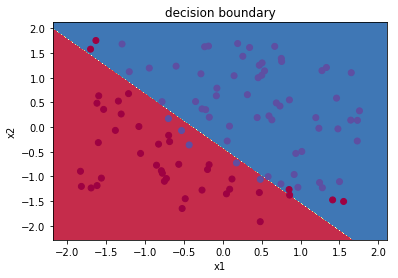

W=[[ 1.56589113  1.40843044]]
b=[[ 0.57987849]]


In [11]:
train_X, train_y = load_flat_dataset("data/ex2data1.txt")
train_X, mu, sigma= feature_normalize(train_X) #如果不采用归一化，则梯度下降的非常慢

model = rm.LogisticRegression(num_features=train_X.shape[0], activator=Sigmoid,
                              regularizer=Regularizer(), iterator=NumberIterator(epoch_times), 
                              optimizer=GradientOptimizer(learning_rate), initializer=WeightInitializer(),
                              keep_cost_num_epoch=keep_cost_num_epoch)
model.fit(train_X, train_y, print_cost=True, print_num_epoch=print_num_epoch)   
model.plot_costs()
model.print_accuracy_train_test(train_X, train_y)
model.plot_decision_boundary(train_X, train_y)

print("W={}".format(model.W))
print("b={}".format(model.b))



In [12]:
b = model.b - np.dot(model.W, mu/sigma)
W = model.W/sigma.T
print("W={}".format(W))
print("b={}".format(b))

W=[[ 0.08047452  0.07579222]]
b=[[-9.72192551]]


## 2.2 Regularized logistic regression
### 2.21 Visualizing the data

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests,you would like to determine whether the microchips should be accepted or rejected. 

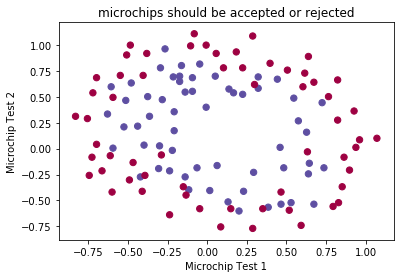

In [13]:
train_X, train_y = load_flat_dataset("data/ex2data2.txt")
plt.scatter(train_X[0,:], train_X[1,:], s=40, c=train_y.T, cmap=plt.cm.Spectral)
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.title("microchips should be accepted or rejected")

### 2.22 Feature mapping

In [42]:
reload(rm)

level = logging.INFO
# level = logging.DEBUG
epoch_times, print_num_epoch, keep_cost_num_epoch = check_debug_mode(
    level, epoch_times=2000, print_num_epoch=100, keep_cost_num_epoch=10)
learning_rate = 0.1
alpha = 1

train_X, train_y = load_flat_dataset("data/ex2data2.txt")
train_X = map_feature(train_X, 6)
print(train_X.shape)
np.testing.assert_array_almost_equal(train_X[0:5,0], [5.126700e-002,  6.995600e-001,
                                                      2.628305e-003,  3.586434e-002,
                                                      4.893842e-001])


model = rm.LogisticRegression(num_features=train_X.shape[0], activator=Sigmoid,
                              regularizer=L2Regularizer(alpha), iterator=NumberIterator(epoch_times), 
                              optimizer=GradientOptimizer(learning_rate), initializer=WeightInitializer(),
                              keep_cost_num_epoch=keep_cost_num_epoch)
model.propagate(train_X, train_y)
print("cost={}".format(model.cost))
print("W={}".format(train_X[:,0]))
print("dW={}".format(model.dW))
print("db={}".format(model.db))

np.testing.assert_array_almost_equal(model.cost, 0.6931472)
np.testing.assert_array_almost_equal(model.dW[0,0:3], [ 1.878809e-002,  7.777119e-005,  5.034464e-002])
np.testing.assert_array_almost_equal(model.db, [[8.474576e-003]])

(27, 118)
cost=0.6931471805599454
W=[  5.12670000e-02   6.99560000e-01   2.62830529e-03   3.58643425e-02
   4.89384194e-01   1.34745327e-04   1.83865725e-03   2.50892595e-02
   3.42353606e-01   6.90798869e-06   9.42624411e-05   1.28625106e-03
   1.75514423e-02   2.39496889e-01   3.54151856e-07   4.83255257e-06
   6.59422333e-05   8.99809795e-04   1.22782870e-02   1.67542444e-01
   1.81563032e-08   2.47750473e-07   3.38066048e-06   4.61305487e-05
   6.29470940e-04   8.58939846e-03   1.17205992e-01]
dW=[[  1.87880932e-02   7.77711864e-05   5.03446395e-02   1.15013308e-02
    3.76648474e-02   1.83559872e-02   7.32393391e-03   8.19244468e-03
    2.34764889e-02   3.93486234e-02   2.23923907e-03   1.28600503e-02
    3.09593720e-03   3.93028171e-02   1.99707467e-02   4.32983232e-03
    3.38643902e-03   5.83822078e-03   4.47629067e-03   3.10079849e-02
    3.10312442e-02   1.09740238e-03   6.31570797e-03   4.08503006e-04
    7.26504316e-03   1.37646175e-03   3.87936363e-02]]
db=[[ 0.00847458]]


In [43]:
#修改了默认的函数，主要增加了map_feature
def plot_decision_boundary1(model, X, y, title="decision boundary"):

    plt.title(title)
    axes = plt.gca()
    min = X.min(axis=1)
    max = X.max(axis=1)
    range = max - min
    min = min - 0.1 * range
    max = max + 0.1 * range
    axes.set_xlim((min[0], max[0]))
    axes.set_ylim((min[1], max[1]))
    plot_decision_boundary(lambda x: model.predict(map_feature(x.T, 6)), X, y)
       

INFO: Cost after epoch 0: 0.6931471806
INFO: Cost after epoch 100: 0.6281611544
INFO: Cost after epoch 200: 0.5964057129
INFO: Cost after epoch 300: 0.5763001817
INFO: Cost after epoch 400: 0.5627729037
INFO: Cost after epoch 500: 0.5534108969
INFO: Cost after epoch 600: 0.5468150844
INFO: Cost after epoch 700: 0.5421056538
INFO: Cost after epoch 800: 0.5387067519
INFO: Cost after epoch 900: 0.5362316683
INFO: Cost after epoch 1000: 0.5344156169
INFO: Cost after epoch 1100: 0.5330744194
INFO: Cost after epoch 1200: 0.5320782755
INFO: Cost after epoch 1300: 0.5313346919
INFO: Cost after epoch 1400: 0.5307771361
INFO: Cost after epoch 1500: 0.5303573617
INFO: Cost after epoch 1600: 0.5300401369
INFO: Cost after epoch 1700: 0.5297995759
INFO: Cost after epoch 1800: 0.5296165571
INFO: Cost after epoch 1900: 0.5294768870
INFO: Final Cost after epoch 2000: 0.5293699847


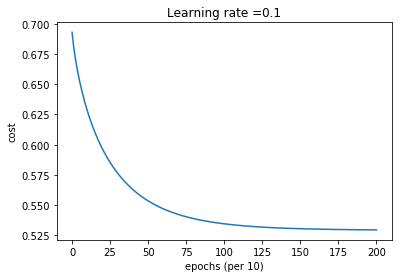

On the train set:
Accuracy: 0.830508474576


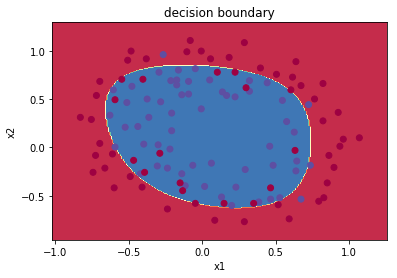

W=[[ 0.58268223  1.13145396 -1.92030509 -0.83069502 -1.28511956  0.10193843
  -0.34257466 -0.34140358 -0.18125296 -1.40968606 -0.06605657 -0.58038783
  -0.24614792 -1.14682154 -0.24322346 -0.20115954 -0.05872428 -0.25852141
  -0.27171707 -0.49103032 -1.01584704  0.01109552 -0.28018734  0.00479323
  -0.30978387 -0.12605342 -0.9402021 ]]
b=[[ 1.20532732]]


In [44]:
train_X_orig, train_y = load_flat_dataset("data/ex2data2.txt")
train_X = map_feature(train_X_orig, 6)

model = rm.LogisticRegression(num_features=train_X.shape[0], activator=Sigmoid,
                              regularizer=L2Regularizer(alpha), iterator=NumberIterator(epoch_times), 
                              optimizer=GradientOptimizer(learning_rate), initializer=WeightInitializer(),
                              keep_cost_num_epoch=keep_cost_num_epoch)
model.fit(train_X, train_y, print_cost=True, print_num_epoch=print_num_epoch)   
model.plot_costs()
model.print_accuracy_train_test(train_X, train_y)
plot_decision_boundary1(model, train_X, train_y)

print("W={}".format(model.W))
print("b={}".format(model.b))

如果alpha=0，希望发现决策边界更加的拟合，即过拟合，但实际情况加上正则项，结果反而更好。好奇怪，哪里有错误吗? 

INFO: Cost after epoch 0: 0.6931471806
INFO: Cost after epoch 100: 0.6236829484
INFO: Cost after epoch 200: 0.5838201301
INFO: Cost after epoch 300: 0.5541802022
INFO: Cost after epoch 400: 0.5306821949
INFO: Cost after epoch 500: 0.5114709732
INFO: Cost after epoch 600: 0.4954417317
INFO: Cost after epoch 700: 0.4818540666
INFO: Cost after epoch 800: 0.4701843598
INFO: Cost after epoch 900: 0.4600502793
INFO: Cost after epoch 1000: 0.4511658724
INFO: Cost after epoch 1100: 0.4433129016
INFO: Cost after epoch 1200: 0.4363218277
INFO: Cost after epoch 1300: 0.4300588471
INFO: Cost after epoch 1400: 0.4244168583
INFO: Cost after epoch 1500: 0.4193090409
INFO: Cost after epoch 1600: 0.4146642109
INFO: Cost after epoch 1700: 0.4104234034
INFO: Cost after epoch 1800: 0.4065373227
INFO: Cost after epoch 1900: 0.4029644102
INFO: Final Cost after epoch 2000: 0.3996693645


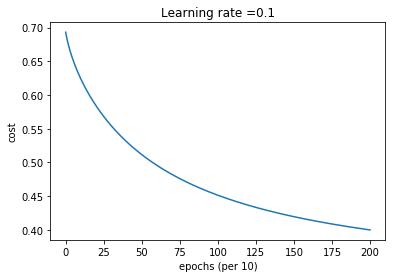

On the train set:
Accuracy: 0.813559322034


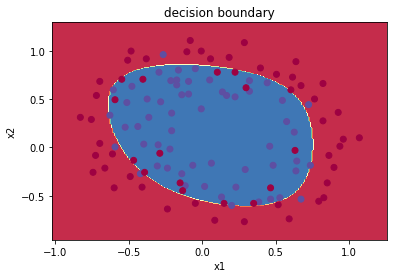

In [45]:
model = rm.LogisticRegression(num_features=train_X.shape[0], activator=Sigmoid,
                              regularizer=Regularizer(), iterator=NumberIterator(epoch_times), 
                              optimizer=GradientOptimizer(learning_rate), initializer=WeightInitializer(),
                              keep_cost_num_epoch=keep_cost_num_epoch)
model.fit(train_X, train_y, print_cost=True, print_num_epoch=print_num_epoch)   
model.plot_costs()
model.print_accuracy_train_test(train_X, train_y)
plot_decision_boundary1(model, train_X, train_y)